# Exploratory Data Analysis - Registered Companies in India (1900-2020)



![](https://i.imgur.com/yDFxWpV.jpg)

## **Introduction**

India's growth lies not only in the potential of its companies, but in the collective strength of their aspirations, innovation, and determination."

    Dwijendra Tripathi, former IIM professor

Embark on a captivating voyage through time, exploring the awe-inspiring odyssey of India's indomitable stalwarts that have shaped the nation's extraordinary tale of enduring growth and resilience. Amidst the turbulent currents of history, where the world witnessed two World Wars, the daunting specter of the Great Depression, **India's arduous struggle for independence, and the intricate dance of the license-permit era, these remarkable companies stood steadfast, weathering storms and adapting ceaselessly!**


## **Outline of project**

In this notebook, we will embark on an exhilarating journey of exploratory data analysis, unraveling the stories hidden within a dataset encompassing companies registered in India from the period 1857 to 2020. Armed with the power of Python, along with the remarkable libraries of Pandas, Matplotlib, Seaborn, and Plotly, we will dive deep into the data, illuminating its nuances and extracting valuable insights.

    Dataset Description:
    Our dataset comprises comprehensive information about the companies registered in India over a span of more than 160 years. It encompasses a vast array of attributes, including company names, registration dates, industry sectors, locations, financial details, and much more. By delving into this rich tapestry of data, we aim to discern patterns, trends, and intriguing connections that will shed light on the growth and evolution of Indian businesses.

    Data Preparation & Cleaning:
    Before embarking on our exploratory journey, we will diligently prepare and clean the dataset to ensure its integrity and suitability for analysis. This phase involves tasks such as handling missing values, removing duplicates, standardizing data formats, and addressing any inconsistencies that may arise. By ensuring the dataset's cleanliness, we lay a solid foundation for accurate and reliable insights.

    Exploratory Analysis:
    With our dataset primed for analysis, we will immerse ourselves in the realm of exploratory analysis. Through a plethora of visualizations, statistical summaries, and interactive plots, we will uncover fascinating patterns, distributions, and relationships within the data. This stage will involve techniques such as data profiling, univariate analysis, bivariate analysis, correlation analysis, and more. Our goal is to gain a comprehensive understanding of the dataset's characteristics and discern meaningful insights.

    Questions & Answers:
    As we navigate through the data, we will pose thought-provoking questions and seek answers that will unveil the dataset's hidden gems. We will leverage our analytical toolkit to derive insights about the top industries, geographical distribution, temporal trends, financial performance, and any other pertinent aspects that pique our curiosity. By asking the right questions and utilizing appropriate analysis techniques, we will extract valuable knowledge from the dataset.

    Summary and Conclusion:
    As we draw our exploratory data analysis to a close, we will summarize our findings, distilling the essence of our discoveries into a coherent narrative. We will reflect upon the growth trajectory of Indian companies, the changing landscape of industries, and the transformative impact of historical events and economic shifts. Our exploration will culminate in a compelling conclusion that encapsulates the significance and implications of our analysis.

### **1. Dataset Description**

#### 1.1 About the data

In this analysis, we will utilize the dataset "Indian Companies Registration Data [1857 - 2020]" obtained from Kaggle. The dataset, named "registered_companies.csv," encompasses detailed information on all Indian companies registered between the years 1857 and 2020.

Dataset Summary:

    Number of Rows: 1,992,170
    Number of Columns: 17

Column Descriptions:

    CORPORATE_IDENTIFICATION_NUMBER: This unique identification number, also known as CIN, is assigned by the Registrar of Companies (ROC) under the Ministry of Corporate Affairs (MCA) in various states.

    COMPANY_NAME: Name of the company.

    COMPANY_STATUS: The status of the company, indicating its current state, such as active, dormant, dissolved, under liquidation, etc.

    COMPANY_CLASS: Classification of companies as public, private, or private limited (One Person Company).

    COMPANY_CATEGORY: Category of the company, specifying whether it is limited by shares, limited by guarantee, or an unlimited company.

    COMPANY_SUB_CATEGORY: Sub-category of the company, including non-government company, state government company, subsidiary of foreign company, guarantee and association company, and union government company.

    DATE_OF_REGISTRATION: Date of registration of the company.

    REGISTERED_STATE: The state in which the company was registered.

    AUTHORIZED_CAP: Authorized capital of the company in Indian Rupees (INR).

    PAIDUP_CAPITAL: Paid-up capital of the company in Indian Rupees (INR).

    INDUSTRIAL_CLASS: Industrial class of the company according to the National Industrial Classification (NIC) 2004.

    PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN: Principal business activity of the company as per the Corporate Identification Number (CIN).

    REGISTERED_OFFICE_ADDRESS: The registered office address of the company.

    REGISTRAR_OF_COMPANIES: Registrar office responsible for the company's registration.

    EMAIL_ADDR: Email address of the company's owner/director.

    LATEST_YEAR_ANNUAL_RETURN: Annual return for the latest year available.

    LATEST_YEAR_FINANCIAL_STATEMENT: Financial statement for the latest year available.

In our analysis, we will perform data exploration, data cleaning, and visualization techniques using Python, Pandas, Matplotlib, Seaborn, and Plotly. By delving into this comprehensive dataset, we aim to uncover intriguing insights and patterns, gaining a deeper understanding of the growth and dynamics of registered companies in India.


### Install the necessary libraries

In [2]:
!pip install jovian --upgrade --quiet


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
!pip install plotly opendatasets --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 44.7 MB/s eta 0:00:00


### Importing the libraries

In [4]:
import jovian
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly import graph_objects as go

### Saving Our Work

In [ ]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


#### Downloading the data

Let's download the data from Kaggle using the `opendatasets` library. You will need your Kaggle access token handy.

In [6]:
companies = 'https://www.kaggle.com/datasets/rowhitswami/all-indian-companies-registration-data-1900-2019'

In [7]:
od.download(companies,force=True)

100%|██████████| 112M/112M [00:01<00:00, 103MB/s]


#### Double check if the data has been downloaded

In [8]:
!dir all-indian-companies-registration-data-1900-2019


registered_companies.csv


## Data Preprocessing and Cleaning with Pandas

#### Load the dataset into a data frame using Pandas

In [9]:
reg_comp_csv = 'all-indian-companies-registration-data-1900-2019/registered_companies.csv'

In [10]:
%%time
reg_com_df = pd.read_csv(reg_comp_csv)

<timed exec>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.


CPU times: user 12.1 s, sys: 1.64 s, total: 13.7 s
Wall time: 13.9 s


In [11]:
reg_com_df

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,INDUSTRIAL_CLASS,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,REGISTRAR_OF_COMPANIES,EMAIL_ADDR,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
0,F01450,NIKO RESOURCES LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"4TH FLOOR,LANDMARKRACE COURSE",ROC DELHI,SANJAY@NIKOINDIA.COM,NaN,NaN
1,F01518,WORLDWIDE RESOURCES HOLDINGS LTD,ACTV,NaN,NaN,NaN,16-07-1998,Gujarat,0.0,0.0,NaN,Agriculture & allied,403 3 6 322 MAHAVIR HOUSEBUSHEER BAGH HYDERGUD...,ROC DELHI,NaN,NaN,NaN
2,F01573,ATWOOD OCEANIC PACIFIC LIMITED,ACTV,NaN,NaN,NaN,NaN,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Quadrant 1, Plot Number 18, 2nd FloorSuman Tow...",ROC DELHI,info@nangia.com,NaN,NaN
3,F01802,SOLVAY S A BELGIUM,NAEF,NaN,NaN,NaN,25-06-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,"Plot No. 3526 & 3527,GIDC Industrial Estate,",ROC DELHI,amit.kumashi@solvay.com,NaN,NaN
4,F01818,TATE AND LYLE INDUSTRIES LTD,ACTV,NaN,NaN,NaN,25-07-2001,Gujarat,0.0,0.0,NaN,Agriculture & allied,24 ATMAJYOTI NAGARELLORA PARK,ROC DELHI,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992165,U51109NL2000PTC006232,SCIENTIFIC ADVANCE INSTRUMENTS & EQUIPMENTS CO...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,20000.0,51109.0,Wholesale and retail trade repair of motor veh...,"BEHIND TOWN COMMITTEE,MKALABARI ROAD",ROC SHILLONG,NaN,NaN,NaN
1992166,U51109NL2000PTC006233,SUNSHINE INSTRUMENTS & EQUIPMENTS COMPANY PRIV...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,200000.0,51109.0,Wholesale and retail trade repair of motor veh...,JAIN TEMPLE ROADDIMAPUR,ROC SHILLONG,NaN,NaN,NaN
1992167,U51109NL2000PTC006259,STERN (INDIA) PLANTATION & MARKETING PRIVATE L...,STOF,Private,Company limited by Shares,Non-govt company,25-07-2000,Nagaland,200000.0,3000.0,51109.0,Wholesale and retail trade repair of motor veh...,RENGMA CHURCH BUILDINGKHERMAHALDIMAPUR,ROC SHILLONG,NaN,NaN,NaN
1992168,U74950NL1998PTC005463,T.A. NGULLIE FRUIT PRODUCTS PVT LTD.,STOF,Private,Company limited by Shares,Non-govt company,09-07-1998,Nagaland,2500000.0,0.0,74950.0,Real estate renting and business activities,"CHUMUKEDIME,BLOCK-3, DIST.KOHIMA.",ROC SHILLONG,rks97cs@yahoo.com,NaN,NaN


#### Exploring the data

In [12]:
reg_com_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 17 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         1992170 non-null  object 
 1   COMPANY_NAME                            1992170 non-null  object 
 2   COMPANY_STATUS                          1992170 non-null  object 
 3   COMPANY_CLASS                           1987092 non-null  object 
 4   COMPANY_CATEGORY                        1987085 non-null  object 
 5   COMPANY_SUB_CATEGORY                    1987080 non-null  object 
 6   DATE_OF_REGISTRATION                    1989645 non-null  object 
 7   REGISTERED_STATE                        1992170 non-null  object 
 8   AUTHORIZED_CAP                          1992170 non-null  float64
 9   PAIDUP_CAPITAL                          1992170 non-null  float64
 10  INDUSTRIAL_CLASS              

In [13]:
reg_com_df.describe()

,AUTHORIZED_CAP,PAIDUP_CAPITAL
count,1.992170e+06,1.992170e+06
mean,4.238508e+07,2.434621e+07
std,2.960562e+09,2.313154e+09
min,0.000000e+00,0.000000e+00
25%,1.000000e+05,1.000000e+05
50%,5.000000e+05,1.000000e+05
75%,1.500000e+06,5.020000e+05
max,1.850000e+12,1.699613e+12


Lets make a copy of the original dataset and use it instead of tampering with the original dataset

In [14]:
necessary_columns = ['CORPORATE_IDENTIFICATION_NUMBER',
                    'COMPANY_NAME',
                    'COMPANY_STATUS',
                    'COMPANY_CLASS',
                    'COMPANY_CATEGORY',
                    'COMPANY_SUB_CATEGORY',
                    'DATE_OF_REGISTRATION',
                    'REGISTERED_STATE',
                    'AUTHORIZED_CAP',
                    'PAIDUP_CAPITAL',
                    'PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN',
                    'REGISTERED_OFFICE_ADDRESS',
                    'LATEST_YEAR_ANNUAL_RETURN',
                    'LATEST_YEAR_FINANCIAL_STATEMENT']

In [15]:
companies_df = reg_com_df[necessary_columns].copy()

In [16]:
companies_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1992170 entries, 0 to 1992169
Data columns (total 14 columns):
 #   Column                                  Non-Null Count    Dtype  
---  ------                                  --------------    -----  
 0   CORPORATE_IDENTIFICATION_NUMBER         1992170 non-null  object 
 1   COMPANY_NAME                            1992170 non-null  object 
 2   COMPANY_STATUS                          1992170 non-null  object 
 3   COMPANY_CLASS                           1987092 non-null  object 
 4   COMPANY_CATEGORY                        1987085 non-null  object 
 5   COMPANY_SUB_CATEGORY                    1987080 non-null  object 
 6   DATE_OF_REGISTRATION                    1989645 non-null  object 
 7   REGISTERED_STATE                        1992170 non-null  object 
 8   AUTHORIZED_CAP                          1992170 non-null  float64
 9   PAIDUP_CAPITAL                          1992170 non-null  float64
 10  PRINCIPAL_BUSINESS_ACTIVITY_AS

We can see that there are multiple columns with missing values like `LATEST_YEAR_ANNUAL_RETURN` and `LATEST_YEAR_FINANCIAL_STATEMENT`.
There are also a few missing values in the columns `COMPANY_CLASS`, `COMPANY_CATEGORY`, `COMPANY_SUB_CATEGORY`, `DATE_OF_REGISTRATION`, `PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN` and `REGISTERED_OFFICE_ADDRESS`.

In [17]:
companies_df.isnull().sum()

CORPORATE_IDENTIFICATION_NUMBER                0
COMPANY_NAME                                   0
COMPANY_STATUS                                 0
COMPANY_CLASS                               5078
COMPANY_CATEGORY                            5085
COMPANY_SUB_CATEGORY                        5090
DATE_OF_REGISTRATION                        2525
REGISTERED_STATE                               0
AUTHORIZED_CAP                                 0
PAIDUP_CAPITAL                                 0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        12
REGISTERED_OFFICE_ADDRESS                  15259
LATEST_YEAR_ANNUAL_RETURN                 831317
LATEST_YEAR_FINANCIAL_STATEMENT           828829
dtype: int64

**Replace the missing values**

In [18]:
companies_df = companies_df.dropna(subset=['COMPANY_SUB_CATEGORY'])
print(len(companies_df))

1987080


In [19]:
companies_df.head()

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
70,L01110GJ1991PLC015846,AMRAWORLD AGRICO LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,21-06-1991,Gujarat,130000000.0,120300000.0,Agriculture & allied,"24, LAXMI CHAMBERS, NAVJEEVAN PRESS ROAD,OPP. ...",31-03-2019,31-03-2019
71,L01110GJ1994PLC021066,TRANS TECHNO FOODS LIMITED,ULQD,Public,Company limited by Shares,Non-govt company,17-01-1994,Gujarat,220000000.0,211200000.0,Agriculture & allied,B-2 SARITA DARSHAN OPP JAIHIND PRESSASHRAM ROAD,31-03-2009,31-03-2006
72,L01110GJ1994PLC021368,GALAXY AGRICO EXPORTS LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,23-02-1994,Gujarat,55000000.0,27316200.0,Agriculture & allied,"236, Jai Kishan Industrial Estate,Behind Murli...",31-03-2019,31-03-2019
73,L01110GJ1996PLC029329,CHEMCRUX ENTERPRISES LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,15-04-1996,Gujarat,60000000.0,49362800.0,Agriculture & allied,"330, TRIVIA Complex,Natubhai Circle, Racecourse",31-03-2019,31-03-2019
74,L01111GJ2011PLC068414,JIYA ECO-PRODUCTS LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,27-12-2011,Gujarat,320000000.0,300732620.0,Agriculture & allied,"SURVEY NO. 202/2/1, NAVAGAM (G),TALUKA VALLABH...",31-03-2019,31-03-2019


In [20]:
#checking the missing values in the columns now
companies_df.isna().sum()

CORPORATE_IDENTIFICATION_NUMBER                0
COMPANY_NAME                                   0
COMPANY_STATUS                                 0
COMPANY_CLASS                                  0
COMPANY_CATEGORY                               0
COMPANY_SUB_CATEGORY                           0
DATE_OF_REGISTRATION                        1673
REGISTERED_STATE                               0
AUTHORIZED_CAP                                 0
PAIDUP_CAPITAL                                 0
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN        12
REGISTERED_OFFICE_ADDRESS                  15233
LATEST_YEAR_ANNUAL_RETURN                 826234
LATEST_YEAR_FINANCIAL_STATEMENT           823748
dtype: int64

In [21]:
companies_df

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
70,L01110GJ1991PLC015846,AMRAWORLD AGRICO LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,21-06-1991,Gujarat,130000000.0,120300000.0,Agriculture & allied,"24, LAXMI CHAMBERS, NAVJEEVAN PRESS ROAD,OPP. ...",31-03-2019,31-03-2019
71,L01110GJ1994PLC021066,TRANS TECHNO FOODS LIMITED,ULQD,Public,Company limited by Shares,Non-govt company,17-01-1994,Gujarat,220000000.0,211200000.0,Agriculture & allied,B-2 SARITA DARSHAN OPP JAIHIND PRESSASHRAM ROAD,31-03-2009,31-03-2006
72,L01110GJ1994PLC021368,GALAXY AGRICO EXPORTS LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,23-02-1994,Gujarat,55000000.0,27316200.0,Agriculture & allied,"236, Jai Kishan Industrial Estate,Behind Murli...",31-03-2019,31-03-2019
73,L01110GJ1996PLC029329,CHEMCRUX ENTERPRISES LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,15-04-1996,Gujarat,60000000.0,49362800.0,Agriculture & allied,"330, TRIVIA Complex,Natubhai Circle, Racecourse",31-03-2019,31-03-2019
74,L01111GJ2011PLC068414,JIYA ECO-PRODUCTS LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,27-12-2011,Gujarat,320000000.0,300732620.0,Agriculture & allied,"SURVEY NO. 202/2/1, NAVAGAM (G),TALUKA VALLABH...",31-03-2019,31-03-2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1992165,U51109NL2000PTC006232,SCIENTIFIC ADVANCE INSTRUMENTS & EQUIPMENTS CO...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,20000.0,Wholesale and retail trade repair of motor veh...,"BEHIND TOWN COMMITTEE,MKALABARI ROAD",NaN,NaN
1992166,U51109NL2000PTC006233,SUNSHINE INSTRUMENTS & EQUIPMENTS COMPANY PRIV...,STOF,Private,Company limited by Shares,Non-govt company,30-06-2000,Nagaland,1000000.0,200000.0,Wholesale and retail trade repair of motor veh...,JAIN TEMPLE ROADDIMAPUR,NaN,NaN
1992167,U51109NL2000PTC006259,STERN (INDIA) PLANTATION & MARKETING PRIVATE L...,STOF,Private,Company limited by Shares,Non-govt company,25-07-2000,Nagaland,200000.0,3000.0,Wholesale and retail trade repair of motor veh...,RENGMA CHURCH BUILDINGKHERMAHALDIMAPUR,NaN,NaN
1992168,U74950NL1998PTC005463,T.A. NGULLIE FRUIT PRODUCTS PVT LTD.,STOF,Private,Company limited by Shares,Non-govt company,09-07-1998,Nagaland,2500000.0,0.0,Real estate renting and business activities,"CHUMUKEDIME,BLOCK-3, DIST.KOHIMA.",NaN,NaN


In [22]:
jovian.commit(project='EDA On Registered Companies In India From 1900-2019')

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Exploratory Data Analysis

![EDA-IMAGE](https://i.imgur.com/ocCzfxL.png)

Let's explore the values in each column of `companies_df`. Use the functions like `max`, `min`, `unique`, `nunique`, `value_counts`, `isna` etc. to survey the range and distribution of values in the different columns.

In [23]:
# Print out the unique values in the each column of the dataframe
unique_values = companies_df.nunique()
print(unique_values)

CORPORATE_IDENTIFICATION_NUMBER           1987080
COMPANY_NAME                              1981229
COMPANY_STATUS                                 12
COMPANY_CLASS                                   3
COMPANY_CATEGORY                                3
COMPANY_SUB_CATEGORY                            5
DATE_OF_REGISTRATION                        27648
REGISTERED_STATE                               36
AUTHORIZED_CAP                               9076
PAIDUP_CAPITAL                             144243
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN         17
REGISTERED_OFFICE_ADDRESS                 1782891
LATEST_YEAR_ANNUAL_RETURN                     554
LATEST_YEAR_FINANCIAL_STATEMENT               443
dtype: int64


Let's do the same for columns like `COMPANY_STATUS`,`COMPANY_CLASS`,`COMPANY_CATEGORY`.

In [24]:
unique_status = companies_df['COMPANY_STATUS'].unique()
print(unique_status)

['ACTV' 'ULQD' 'AMAL' 'STOF' 'DISD' 'NAEF' 'CLLD' 'UPSO' 'CLLP' 'D455'
 'LIQD' 'DRMT']


In [25]:
unique_company_category = companies_df['COMPANY_CATEGORY'].unique()
print(unique_company_category)

['Company limited by Shares' 'Company Limited by Guarantee'
 'Unlimited Company']


In [26]:
unique_category = companies_df['COMPANY_CLASS'].unique()
print(unique_category)

['Public' 'Private' 'Private(One Person Company)']


Let's do this to check min and max values in columns `AUTHORIZED_CAP`,`PAIDUP_CAPITAL`

In [27]:
authorized_cap_max = companies_df['AUTHORIZED_CAP'].max()
authorized_cap_min = companies_df['AUTHORIZED_CAP'].min()
print(f'Max Authorized Capital: {authorized_cap_max}')
print(f'Min Authorized Capital: {authorized_cap_min}')

Max Authorized Capital: 1850000000000.0
Min Authorized Capital: 0.0


In [28]:
paidup_capital_max = companies_df['PAIDUP_CAPITAL'].max()
paidup_capital_min = companies_df['PAIDUP_CAPITAL'].min()
print(f'Max Paidup Capital: {paidup_capital_max}')
print(f'Min Paidup Capital: {paidup_capital_min}')

Max Paidup Capital: 1699613000000.0
Min Paidup Capital: 0.0


Let's go through other columns like `COMPANY_STATUS`,`COMPANY_CLASS`,`COMPANY_CATEGORY`.

In [29]:
companies_df['COMPANY_STATUS'].value_counts()

ACTV    1186744
STOF     688727
UPSO      41443
AMAL      24892
CLLP      13175
DISD       9755
NAEF       7752
ULQD       6454
CLLD       4874
D455       2145
LIQD       1117
DRMT          2
Name: COMPANY_STATUS, dtype: int64

In [30]:
companies_df['COMPANY_CLASS'].value_counts()

Private                        1819255
Public                          137610
Private(One Person Company)      30215
Name: COMPANY_CLASS, dtype: int64

In [31]:
companies_df['COMPANY_CATEGORY'].value_counts()

Company limited by Shares       1963894
Company Limited by Guarantee      22219
Unlimited Company                   967
Name: COMPANY_CATEGORY, dtype: int64

In [32]:
companies_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts()

Real estate renting and business activities                                                                       679906
Manufacturing                                                                                                     410364
Wholesale and retail trade repair of motor vehicles motorcycles and personal and household goods                  227318
Construction                                                                                                      162119
Financial intermediation                                                                                          120686
Agriculture & allied                                                                                               77741
Transport storage and communications                                                                               63734
Other community social and personal service activities                                                             59224
Extraterritorial organizations a

In [33]:
companies_df.nunique()

CORPORATE_IDENTIFICATION_NUMBER           1987080
COMPANY_NAME                              1981229
COMPANY_STATUS                                 12
COMPANY_CLASS                                   3
COMPANY_CATEGORY                                3
COMPANY_SUB_CATEGORY                            5
DATE_OF_REGISTRATION                        27648
REGISTERED_STATE                               36
AUTHORIZED_CAP                               9076
PAIDUP_CAPITAL                             144243
PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN         17
REGISTERED_OFFICE_ADDRESS                 1782891
LATEST_YEAR_ANNUAL_RETURN                     554
LATEST_YEAR_FINANCIAL_STATEMENT               443
dtype: int64

Let's save our work before continuing

In [34]:
jovian.commit(project='eda-on-registered-companies-in-india-from-1900-2019')

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


Now we will use libraries like plotly to visualize the status of the companies present in our dataset.

In [35]:
fig = px.histogram(companies_df, x='COMPANY_STATUS', title="Examining the distribution of company statuses across the dataset")
fig.show()

Output hidden; open in https://colab.research.google.com to view.

![company_status](https://i.imgur.com/P4Hc98I.png)

The visualization tell us that out of 1.99 million companies that are registered,1.2 million companies are active `(ACTV)` and 0.6 million comapnies are Striked off `(STOF)`

In [36]:
fig = px.histogram(companies_df,
                   x='REGISTERED_STATE',
                   title='Examining the count of companies across the different states')
fig.show()

Output hidden; open in https://colab.research.google.com to view.

![registered_state](https://i.imgur.com/rS4XbES.png)

The visualization tell us that `Maharashtra` has the highest number of registrations followed by `Delhi` and `Tamil Nadu`.

Now lets get the official numbers from the dataset.

Number of companies category-wise.

In [40]:
category = companies_df['COMPANY_CATEGORY'].value_counts()
category

Company limited by Shares       1963894
Company Limited by Guarantee      22219
Unlimited Company                   967
Name: COMPANY_CATEGORY, dtype: int64

 Number of different types of companies registered.

In [41]:
companies_registered = companies_df['COMPANY_CLASS'].value_counts()
companies_registered

Private                        1819255
Public                          137610
Private(One Person Company)      30215
Name: COMPANY_CLASS, dtype: int64

In [42]:
jovian.commit()

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


## Questions and Answers about the dataset

#### **Q1. Find the states with highest authorized capital and also show the status of the companies in each of the states.**

In [43]:
fig = px.sunburst(companies_df,
                 path=['REGISTERED_STATE', 'COMPANY_STATUS'],
                 values='AUTHORIZED_CAP',
                 color_continuous_scale='RdBu')
fig.show()


The visualization clearly tells us that Maharshtra,Delhi and Gujarat has the highrst authorized capital.

#### **Q2. Determin the current status of companies if they are `ACTV`,`AMAL`,`CLLD`,`CLLP`,`DISD` and etc.**

In [44]:
current_status = companies_df.groupby('COMPANY_STATUS').size().reset_index(name='No_Of_Companies')
current_status

,COMPANY_STATUS,No_Of_Companies
0,ACTV,1186744
1,AMAL,24892
2,CLLD,4874
3,CLLP,13175
4,D455,2145
5,DISD,9755
6,DRMT,2
7,LIQD,1117
8,NAEF,7752
9,STOF,688727


The status of the companies are being defined by acronyms.Lets solve this

In [45]:
company_status_desc = {"ACTV": "Active",
          "NAEF": "Not available for e-filing",
          "ULQD": "Under liquidation",
          "AMAL": "Amalgamated",
          "STOF": "Strike off",
          "DISD": "Dissolved",
          "CLLD": "Converted to LLP and Dissolved",
          "UPSO": "Under process of Striking Off",
          "CLLP": "Converted to LLP",
          "LIQD": "Liquidated",
          "DRMT": "Dormant",
          "MLIQ": "Vanished",
          "D455": "Dormant under section 455"
         }

In [46]:
current_status.COMPANY_STATUS = current_status.COMPANY_STATUS.replace(company_status_desc)
current_status

,COMPANY_STATUS,No_Of_Companies
0,Active,1186744
1,Amalgamated,24892
2,Converted to LLP and Dissolved,4874
3,Converted to LLP,13175
4,Dormant under section 455,2145
5,Dissolved,9755
6,Dormant,2
7,Liquidated,1117
8,Not available for e-filing,7752
9,Strike off,688727


In [47]:
fig = px.pie(current_status,
             values='No_Of_Companies',
             names='COMPANY_STATUS',
             title='Current Status Of The Companies',
             hole=.5)
fig.show()

From the above visualization we can clearly see that around 60% of the companies are active(2020).The next biggest number belongs to Striked Off around 35%.

#### **Q3. Determine the count of company registrations throughout the years. Which year witnessed the highest registration during this duration?**

In [48]:

number_of_registration = companies_df[['DATE_OF_REGISTRATION']].copy()
number_of_registration.dropna(inplace=True)
number_of_registration

,DATE_OF_REGISTRATION
70,21-06-1991
71,17-01-1994
72,23-02-1994
73,15-04-1996
74,27-12-2011
...,...
1992165,30-06-2000
1992166,30-06-2000
1992167,25-07-2000
1992168,09-07-1998


In [49]:
# number_of_registration["DATE_OF_REGISTRATION"] = number_of_registration["DATE_OF_REGISTRATION"].apply(pd.to_datetime, format="%d/%m/%Y")
number_of_registration["DATE_OF_REGISTRATION"] = number_of_registration["DATE_OF_REGISTRATION"].apply(pd.to_datetime,errors='coerce')
number_of_registration.head()

<ipython-input-49-4022a7b5400d>:2: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,DATE_OF_REGISTRATION
70,1991-06-21
71,1994-01-17
72,1994-02-23
73,1996-04-15
74,2011-12-27


Now we can extract the year of registration from the date and add the column to the `number_of_registration` dataframe.

In [50]:
number_of_registration['YEAR_OF_REGISTRATION'] = number_of_registration['DATE_OF_REGISTRATION'].dt.year
number_of_registration['MONTH_OF_REGISTRATION'] = number_of_registration['DATE_OF_REGISTRATION'].dt.month
number_of_registration['COMPANY_CLASS'] = companies_df['COMPANY_CLASS']
number_of_registration

,DATE_OF_REGISTRATION,YEAR_OF_REGISTRATION,MONTH_OF_REGISTRATION,COMPANY_CLASS
70,1991-06-21,1991.0,6.0,Public
71,1994-01-17,1994.0,1.0,Public
72,1994-02-23,1994.0,2.0,Public
73,1996-04-15,1996.0,4.0,Public
74,2011-12-27,2011.0,12.0,Public
...,...,...,...,...
1992165,2000-06-30,2000.0,6.0,Private
1992166,2000-06-30,2000.0,6.0,Private
1992167,2000-07-25,2000.0,7.0,Private
1992168,1998-09-07,1998.0,9.0,Private


Now group the number of companies registered by the year and plot it.

In [51]:
yearwise_registration = number_of_registration.groupby("YEAR_OF_REGISTRATION").size().reset_index(name='NO_OF_COMPANIES')
yearwise_registration.head()

,YEAR_OF_REGISTRATION,NO_OF_COMPANIES
0,1857.0,1
1,1863.0,3
2,1871.0,3
3,1872.0,3
4,1873.0,3


In [52]:
fig = px.bar(yearwise_registration, x='YEAR_OF_REGISTRATION', y='NO_OF_COMPANIES', title='Number of registrations over the years 1857 - 2020')
fig.show()

From the above plot we see that regsitrations took off from around the year 1995. There was a steady rise and reached a peak in the year 1995 and then the registration fell off around the year 2000 - 2001. The reason behind this can be the recession period. After that the number of registrations has been on a steady rise.

Over all the years we see that the maximum registrations took place in the year 2019.

#### **Q4. Find statewise registrations in the year 2015 and also categorize into business activity type.**

In [53]:
number_of_registration.head()

,DATE_OF_REGISTRATION,YEAR_OF_REGISTRATION,MONTH_OF_REGISTRATION,COMPANY_CLASS
70,1991-06-21,1991.0,6.0,Public
71,1994-01-17,1994.0,1.0,Public
72,1994-02-23,1994.0,2.0,Public
73,1996-04-15,1996.0,4.0,Public
74,2011-12-27,2011.0,12.0,Public


In [54]:
number_of_registration['REGISTERED_STATE'] = companies_df['REGISTERED_STATE']
number_of_registration['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'] = companies_df['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']
number_of_registration

,DATE_OF_REGISTRATION,YEAR_OF_REGISTRATION,MONTH_OF_REGISTRATION,COMPANY_CLASS,REGISTERED_STATE,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN
70,1991-06-21,1991.0,6.0,Public,Gujarat,Agriculture & allied
71,1994-01-17,1994.0,1.0,Public,Gujarat,Agriculture & allied
72,1994-02-23,1994.0,2.0,Public,Gujarat,Agriculture & allied
73,1996-04-15,1996.0,4.0,Public,Gujarat,Agriculture & allied
74,2011-12-27,2011.0,12.0,Public,Gujarat,Agriculture & allied
...,...,...,...,...,...,...
1992165,2000-06-30,2000.0,6.0,Private,Nagaland,Wholesale and retail trade repair of motor veh...
1992166,2000-06-30,2000.0,6.0,Private,Nagaland,Wholesale and retail trade repair of motor veh...
1992167,2000-07-25,2000.0,7.0,Private,Nagaland,Wholesale and retail trade repair of motor veh...
1992168,1998-09-07,1998.0,9.0,Private,Nagaland,Real estate renting and business activities


In [55]:
companies_2015 = number_of_registration[number_of_registration['YEAR_OF_REGISTRATION'] == 2015]
companies_2015

,DATE_OF_REGISTRATION,YEAR_OF_REGISTRATION,MONTH_OF_REGISTRATION,COMPANY_CLASS,REGISTERED_STATE,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN
228,2015-06-17,2015.0,6.0,Public,Gujarat,Manufacturing
674,2015-07-15,2015.0,7.0,Public,Gujarat,Manufacturing
697,2015-01-23,2015.0,1.0,Public,Gujarat,Electricity gas and water supply
718,2015-06-17,2015.0,6.0,Public,Gujarat,Construction
797,2015-12-22,2015.0,12.0,Public,Gujarat,Wholesale and retail trade repair of motor veh...
...,...,...,...,...,...,...
1991794,2015-01-29,2015.0,1.0,Private,Nagaland,Other community social and personal service ac...
1991831,2015-09-22,2015.0,9.0,Public,Nagaland,Electricity gas and water supply
1991858,2015-01-30,2015.0,1.0,Private,Nagaland,Real estate renting and business activities
1991861,2015-06-05,2015.0,6.0,Private,Nagaland,Manufacturing


<ipython-input-56-25403303386c>:7: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.




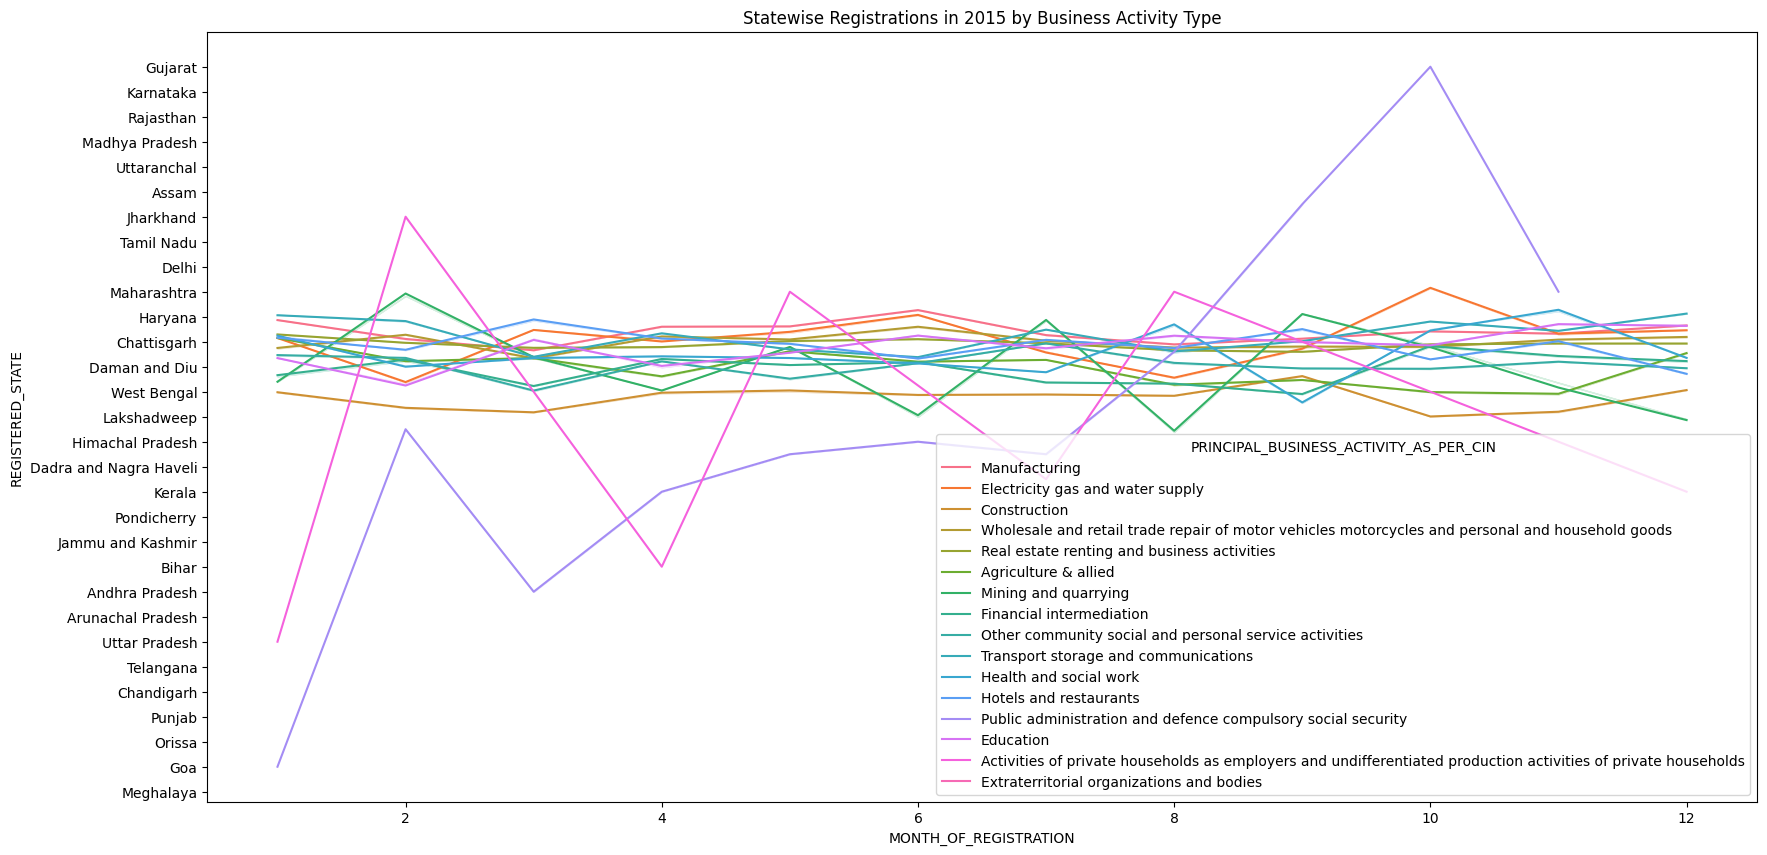

In [56]:
# sns.set(rc={'figure.figsize': (20,10)})
# sns.lineplot(x='MONTH_OF_REGISTRATION', y='REGISTERED_STATE', data=companies_2015, hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN',
#              ci=False, markers=True)


plt.figure(figsize=(20, 10))
sns.lineplot(x='MONTH_OF_REGISTRATION', y='REGISTERED_STATE', data=companies_2015, hue='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN',
             ci=False, markers=True)

plt.title('Statewise Registrations in 2015 by Business Activity Type')
plt.show()









From the above visualization we can see that gujarat has most number of registrations in the month of august in private company class which isnt a surpirse at all as gujarat has made a name for itself in the past years and is known as a hub for the companies.

#### **Q5. Find the number of companies registered state-wise and the top 3 among them.**

In [ ]:
statewise_companies = companies_df.groupby('REGISTERED_STATE').size().reset_index()
statewise_companies

,REGISTERED_STATE,0
0,Andaman and Nicobar Islands,480
1,Andhra Pradesh,32975
2,Arunachal Pradesh,629
3,Assam,12076
4,Bihar,35909
5,Chandigarh,15015
6,Chattisgarh,10698
7,Dadra and Nagra Haveli,550
8,Daman and Diu,397
9,Delhi,346282


Now we need a geopmap file to visualize our data from the dataset for this we'll be using a geomap json file.


In [ ]:
indianStates = "https://gist.githubusercontent.com/sanuann/c4acae43dead7f21976c4fe2ef4dcceb/raw/c4a3d776a05a3f49ce05747f38c86ff4cd011ee0/states-in-india.geojson"

In [ ]:

rename_states = {"Andaman and Nicobar Islands": "Andaman & Nicobar",
                "Jammu and Kashmir": "Jammu & Kashmir",
                "Orissa" : "Odisha",
                "Chattisgarh": "Chhattisgarh",
                "Dadra and Nagra Haveli": "Dadra and Nagar Haveli and Daman and Diu",
                "Pondicherry": "Puducherry",
                "Uttaranchal": "Uttarakhand"}

statewise_companies.REGISTERED_STATE = statewise_companies.REGISTERED_STATE.replace(rename_states)

In [ ]:
ladakh = pd.DataFrame([["Ladakh",0.0]],columns = statewise_companies.columns)
statewise_companies = statewise_companies.append(ladakh,ignore_index=True)

<ipython-input-181-ca54b8ab4f34>:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
fig = px.choropleth_mapbox(
    statewise_companies,
    geojson=indianStates,
    featureidkey='properties.ST_NM',
    locations='REGISTERED_STATE',
    color_continuous_scale="YlOrBr",
    mapbox_style="carto-positron",
    opacity=0.9,
    zoom=3.4,
    center={"lat": 23.473324, "lon": 78.9629},
    color=0,
    title='Number of companies state-wise'
)
fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 0})
fig.show()


The above visualization tells us that `Maharashtra` has the highest number of registration followed by `Delhi`

#### **Q6. Find the highest Principal Business Activity of a company as per CIN**

In [ ]:
principal_business_activity = companies_df.groupby("PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN").size().reset_index(name='NO_OF_COMPANIES')
fig = px.pie(principal_business_activity, values='NO_OF_COMPANIES', names='PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN', title='Principal Business Activity of a company as per CIN (Hover to see the data)', hole=.3)
fig.update_layout(showlegend=False)
fig.update_traces(textposition='outside', textinfo='percent')
fig.show()

So with the above visualization its clear that `Real estate renting and business activities` has the most of companies registrations(34.2%) followed by `Manufacturing`(21%).

#### **Q7. Find Top 20 companies with highest Authorized Capital and its Paidup Capital (INR)**

In [58]:
high_auth_companies = companies_df.sort_values(by='AUTHORIZED_CAP',ascending=False)
high_auth_companies[1:11]

,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,COMPANY_SUB_CATEGORY,DATE_OF_REGISTRATION,REGISTERED_STATE,AUTHORIZED_CAP,PAIDUP_CAPITAL,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,REGISTERED_OFFICE_ADDRESS,LATEST_YEAR_ANNUAL_RETURN,LATEST_YEAR_FINANCIAL_STATEMENT
99038,U72900GJ2007PLC105869,RELIANCE JIO INFOCOMM LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,15-02-2007,Gujarat,1.600000e+12,1.541250e+12,Real estate renting and business activities,"Office -101, SaffronNr. Centre Point, Panchwat...",31-03-2019,31-03-2019
1695580,U32201UP1999SGC024928,U. P. POWER CORPORATION LIMITED,ACTV,Public,Company limited by Shares,State Govt company,30-11-1999,Uttar Pradesh,1.250000e+12,9.390523e+11,Manufacturing,SHAKTI BHAWANASHOK MARGLUCKNOW,31-03-2018,31-03-2014
596958,U74899DL1995PLC066685,TATA TELESERVICES LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,23-03-1995,Delhi,1.000000e+12,4.484528e+11,Real estate renting and business activities,"10TH FLOOR, TOWER I, JEEVAN BHARATI, 124CONNAU...",31-03-2019,31-03-2019
1081992,U40100MH2005SGC153649,MSEB HOLDING COMPANY LIMITED,ACTV,Public,Company limited by Shares,State Govt company,31-05-2005,Maharashtra,9.900000e+11,8.910971e+11,Electricity gas and water supply,HONGKONGBANK BLDG 3RD & 4THFLOOR MAHATMA GANDH...,31-03-2018,31-03-2018
93702,U64200GJ2018PTC105652,JIO DIGITAL FIBRE PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,17-12-2018,Gujarat,9.000000e+11,7.865592e+11,Transport storage and communications,"Office - 101, Saffron, Nr. Centre Point,Panchw...",31-03-2019,31-03-2019
40199,U45200GJ1988SGC010493,SARDAR SAROVAR NARMADA NIGAM LIMITED,ACTV,Public,Company limited by Shares,State Govt company,24-03-1988,Gujarat,6.000000e+11,5.901303e+11,Construction,"BLOCKNO.12,1ST FLOORNEW SACHIVALAY COMPLEX",31-03-2018,31-03-2019
157133,U51900KA2010PTC053234,AMAZON SELLER SERVICES PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,16-04-2010,Karnataka,6.000000e+11,3.348893e+11,Wholesale and retail trade repair of motor veh...,"8TH FLOOR, BRIGADE GATEWAY26/1 DR. RAJKUMAR RO...",31-03-2019,31-03-2019
1083658,U40109MH2005SGC153645,MAHARASHTRA STATE ELECTRICITYDISTRIBUTION COMP...,ACTV,Public,Company limited by Shares,State Govt company,31-05-2005,Maharashtra,6.000000e+11,4.772398e+11,Electricity gas and water supply,PRAKASHGAD PLOT NO G-9ANANT KANEKAR MARGBANDRA...,31-03-2018,31-03-2018
644,L32100GJ1996PLC030976,VODAFONE IDEA LIMITED,ACTV,Public,Company limited by Shares,Non-govt company,14-03-1995,Gujarat,5.000000e+11,2.873539e+11,Manufacturing,"SUMAN TOWER, PLOT NO.18,SECTOR-11,",31-03-2019,31-03-2019
30138,U27100GJ2006PTC106923,ARCELORMITTAL INDIA PRIVATE LIMITED,ACTV,Private,Company limited by Shares,Non-govt company,10-04-2006,Gujarat,5.000000e+11,2.218834e+11,Manufacturing,"Office No. 126, 101-104, GCP Business Centre,O...",31-03-2019,31-03-2019


In [59]:
# top_20_companies = high_auth_companies.head(20)

# fig = px.imshow(
#     top_20_companies[['AUTHORIZED_CAP', 'PAIDUP_CAPITAL']],
#     labels=dict(x='Capital Type', y='Company Name'),
#     x=['AUTHORIZED_CAP', 'PAIDUP_CAPITAL'],
#     y=top_20_companies['COMPANY_NAME'],
#     title='Top 20 Companies with Highest Authorized Capital and Paid-Up Capital',
#     color_continuous_scale='YlOrBr'
# )

# fig.update_layout(
#     autosize=False,
#     width=800,
#     height=600,
# )

# fig.show()

import plotly.graph_objects as go

top_20_companies = high_auth_companies.head(20)

fig = go.Figure()

fig.add_trace(
    go.Bar(
        x=top_20_companies['COMPANY_NAME'],
        y=top_20_companies['AUTHORIZED_CAP'],
        name='Authorized Capital',
        marker=dict(color='rgb(158,202,225)')
    )
)

fig.add_trace(
    go.Bar(
        x=top_20_companies['COMPANY_NAME'],
        y=top_20_companies['PAIDUP_CAPITAL'],
        name='Paid-Up Capital',
        marker=dict(color='rgb(22,96,167)')
    )
)

fig.update_layout(
    title='Top 20 Companies with Highest Authorized Capital and Paid-Up Capital',
    xaxis=dict(title='Company Name'),
    yaxis=dict(title='Capital (in Rupees)'),
    barmode='group',
    legend=dict(x=0.85, y=1),
    plot_bgcolor='rgba(0,0,0,0)'
)

fig.show()



`Jio Platforms` has the highest authorized capital as well as paid-up capital on the other hand `Bharat Sanchar Nigam Ltd` has the loweest authorized capital.

#### **Q8. Yearwise Principal Business activity around the years (2010-2020)**

In [ ]:
# list = ['COMPANY_NAME','COMPANY_STATUS','DATE_OF_REGISTRATION','REGISTERED_STATE','EMAIL_ADDR','PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN']
col_list = ["COMPANY_NAME", "COMPANY_STATUS","DATE_OF_REGISTRATION", "REGISTERED_STATE", "EMAIL_ADDR", "PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN"]

df = pd.read_csv(reg_comp_csv,usecols=col_list)


In [ ]:
df = df[df['DATE_OF_REGISTRATION'].notna()]
df = df[df['EMAIL_ADDR'].notna()]

states = ['Maharashtra', 'Karnataka', 'Telangana', 'Delhi', 'Andhra Pradesh', 'Delhi', 'Gujarat']
years = [2020, 2019, 2018, 2017, 2015, 2014, 2013, 2012, 2011, 2010]
df['year'] = pd.DatetimeIndex(df['DATE_OF_REGISTRATION']).year
df['month'] = pd.DatetimeIndex(df['DATE_OF_REGISTRATION']).month


search = df.loc [df['REGISTERED_STATE'].isin(states) & df['year'].isin(years) & df['COMPANY_STATUS'].str.contains("ACTV",case=False)]
search.head()

<ipython-input-187-e67f42b9acf4>:6: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.

<ipython-input-187-e67f42b9acf4>:7: UserWarning:

Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.



,COMPANY_NAME,COMPANY_STATUS,DATE_OF_REGISTRATION,REGISTERED_STATE,PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,EMAIL_ADDR,year,month
37,BOMBARDIER TRANSPORTATION GMBH,ACTV,11-05-2010,Gujarat,Agriculture & allied,pranavmvshah@gmail.com,2010,11
38,HUNG HUA CONSTRUCTION CO. LTD.,ACTV,09-09-2010,Gujarat,Agriculture & allied,rajdeepsinhjethwa@hotmail.com,2010,9
39,KOREA SOUTH-EAST POWER CO. LTD.,ACTV,17-09-2010,Gujarat,Agriculture & allied,hineshdoshi@vsnl.com,2010,9
40,BLACK PEARL SERVICES LIMITED,ACTV,03-11-2010,Gujarat,Agriculture & allied,blackpearlservices@gmail.com,2010,3
41,TBEA SHENYANG TRANSFORMER GROUP CO. LTD.,ACTV,07-01-2011,Gujarat,Agriculture & allied,rutvik.patel@tbeaindia.com,2011,7


In [ ]:
table = search.groupby('year')['PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN'].value_counts().unstack().fillna(0)
table

PRINCIPAL_BUSINESS_ACTIVITY_AS_PER_CIN,Activities of private households as employers and undifferentiated production activities of private households,Agriculture & allied,Construction,Education,Electricity gas and water supply,Extraterritorial organizations and bodies,Financial intermediation,Health and social work,Hotels and restaurants,Manufacturing,Mining and quarrying,Other community social and personal service activities,Public administration and defence compulsory social security,Real estate renting and business activities,Transport storage and communications,Wholesale and retail trade repair of motor vehicles motorcycles and personal and household goods
year,,,,,,,,,,,,,,,,
2010,4.0,596.0,3018.0,448.0,682.0,2.0,735.0,501.0,540.0,5514.0,239.0,933.0,5.0,8382.0,825.0,2242.0
2011,5.0,746.0,2929.0,549.0,435.0,1.0,664.0,629.0,485.0,5825.0,248.0,1071.0,13.0,10180.0,925.0,2272.0
2012,7.0,631.0,2529.0,578.0,463.0,1.0,666.0,623.0,496.0,5345.0,207.0,1179.0,4.0,10543.0,992.0,2348.0
2013,5.0,752.0,2263.0,582.0,530.0,1.0,548.0,671.0,448.0,5024.0,182.0,1244.0,4.0,10946.0,856.0,2147.0
2014,1.0,763.0,1435.0,373.0,386.0,3.0,470.0,502.0,328.0,3893.0,153.0,799.0,7.0,11068.0,723.0,1661.0
2015,4.0,1128.0,1610.0,431.0,593.0,1.0,605.0,589.0,454.0,4351.0,163.0,843.0,6.0,18439.0,949.0,2234.0
2017,9.0,1784.0,2528.0,1037.0,595.0,2.0,1215.0,869.0,821.0,6455.0,206.0,2516.0,20.0,33984.0,1480.0,3630.0
2018,11.0,1952.0,3004.0,1395.0,653.0,1.0,1674.0,1276.0,1001.0,7648.0,227.0,3266.0,31.0,35034.0,1764.0,4121.0
2019,13.0,2814.0,3729.0,2032.0,781.0,3.0,2581.0,2612.0,1381.0,11905.0,299.0,3579.0,21.0,26783.0,2727.0,6457.0


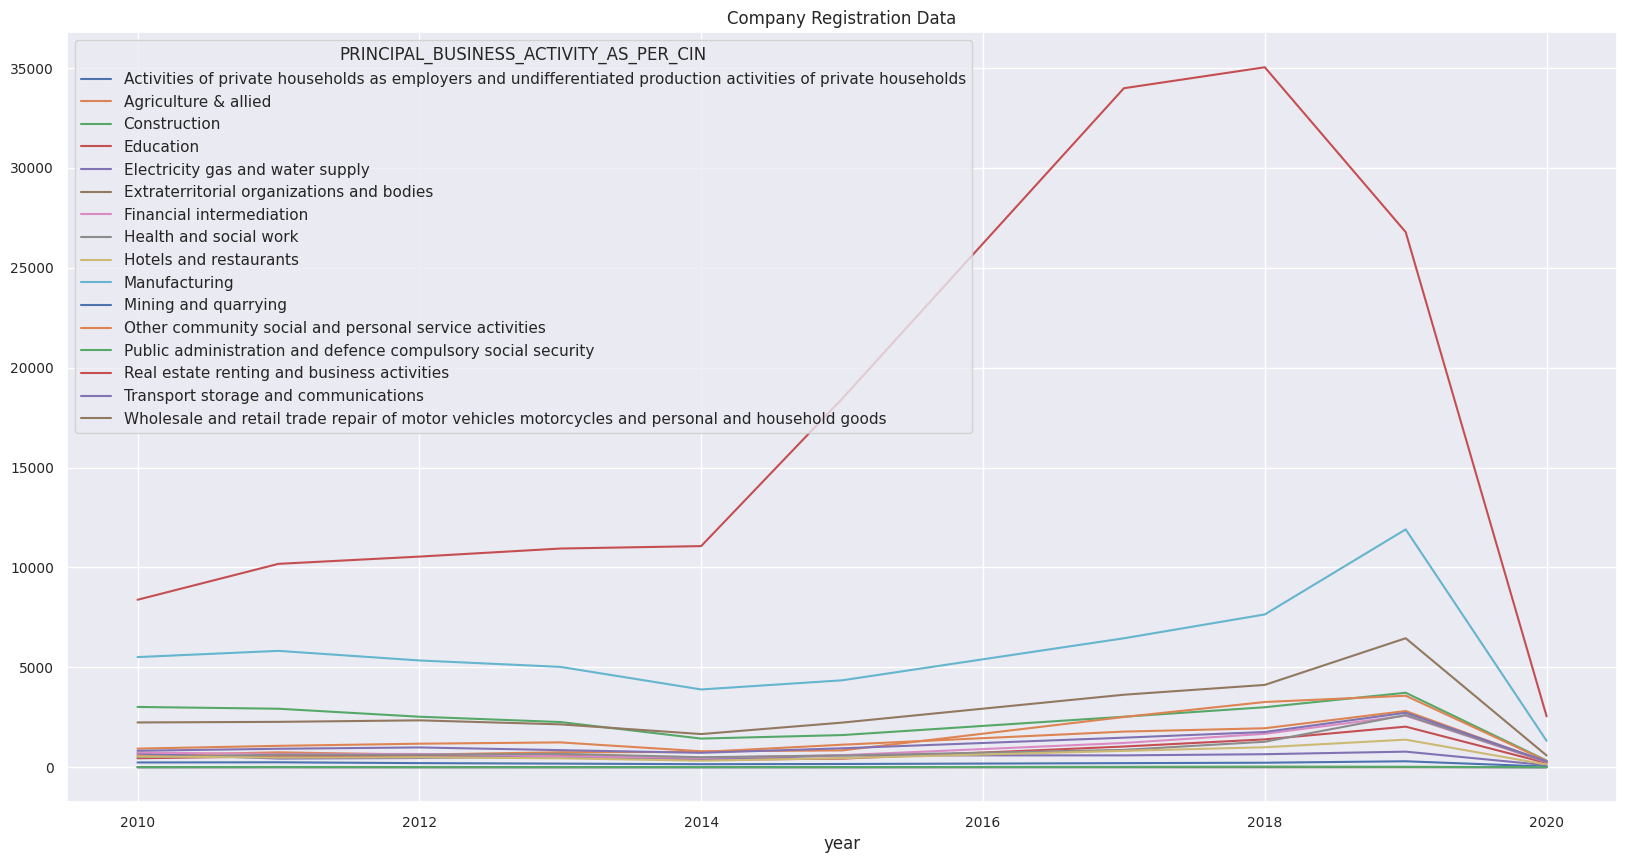

In [ ]:
plotting = table.plot.line(figsize=(20,10), fontsize=10, title="Company Registration Data", legend=True)

From the above plot we can see that Education sector had the highest registration during the last 10 years. It was highest in 2018 and then declined. The next highest registration was in the manufacturing sector with its highest in 2019.

### Summary

In this case study we have analysed the registration of comapnies in India between the years 1900 - 2019.

Here is a summary of the key insights:

- Nearly 1.9 million companies registrations were done.

- Nearly 60% of the companies are still active as of 2020.

- Maharashtra is the leading state in terms of registrations as well as with the highest authorized capital.





### Conclusion

- The analysis of company registrations in India from 1900 to 2019 provides valuable insights into the country's business landscape. With nearly 1.9 million registrations, it is evident that India has a thriving entrepreneurial ecosystem.

- The fact that approximately 60% of the registered companies are still active showcases the sustainability and adaptability of Indian businesses. Despite the challenges faced over the years, these companies have demonstrated resilience and the ability to withstand economic fluctuations.

- The findings from this analysis underscore the importance of entrepreneurship and the continuous growth of businesses in India. It also highlights the need for supportive policies and infrastructure to further nurture and promote the entrepreneurial spirit in the country.

### Future work



- Analysis on the exoplanets discovered till date.
- Analysis on the financial situtation of the companies.

### References

- Jovian : [Data Analysis and Visualization with Python](https://jovian.com/learn/data-analysis-and-visualization-with-python)
- Plotly : https://plotly.com/
- Matplotlib : https://matplotlib.org/
- Pandas : https://pandas.pydata.org/
